In [ ]:
!git clone https://github.com/BLShaw/CDZ-TKBA

Cloning into 'CDZ-TKBA'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 66 (delta 22), reused 55 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (66/66), 2.45 MiB | 13.30 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [ ]:
%cd /content/CDZ-TKBA

/content/CDZ-TKBA


In [ ]:
!python scripts/1_prepare_data.py

=== Step 1: Preparing Datasets ===

[MNIST] Checking/Downloading...
100% 9.91M/9.91M [00:00<00:00, 54.6MB/s]
100% 28.9k/28.9k [00:00<00:00, 1.56MB/s]
100% 1.65M/1.65M [00:00<00:00, 14.5MB/s]
100% 4.54k/4.54k [00:00<00:00, 18.8MB/s]
[MNIST] Processing and saving to .npy...
  Saved mnist_train: (60000, 1, 28, 28)
  Saved mnist_test: (10000, 1, 28, 28)

[FSDD] Checking/Downloading...
  Cloning FSDD to data/fsdd...
Cloning into 'data/fsdd'...
remote: Enumerating objects: 4260, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 4260 (delta 25), reused 8 (delta 8), pack-reused 4212 (from 1)
Receiving objects: 100% (4260/4260), 30.38 MiB | 31.08 MiB/s, done.
Resolving deltas: 100% (129/129), done.
[FSDD] Found 3000 files. Generating Spectrograms...
  Saved fsdd_train: (2700, 1, 64, 64)
  Saved fsdd_test: (300, 1, 64, 64)


In [ ]:
!python scripts/2_generate_encodings.py

=== Step 2: Generating Encodings ===

[Visual] Processing MNIST...
  Training Visual AE on full dataset...
Training Autoencoder on 60000 samples for 100 epochs...
Epoch [10/100], Loss: 0.0062
Epoch [20/100], Loss: 0.0045
Epoch [30/100], Loss: 0.0037
Epoch [40/100], Loss: 0.0032
Epoch [50/100], Loss: 0.0029
Epoch [60/100], Loss: 0.0026
Epoch [70/100], Loss: 0.0024
Epoch [80/100], Loss: 0.0023
Epoch [90/100], Loss: 0.0022
Epoch [100/100], Loss: 0.0021
  Generating Visual Encodings...

[Audio] Processing FSDD...
  Loading 2700 spectrograms from data/spectrograms/train...
  Loading 300 spectrograms from data/spectrograms/test...
  Training Audio AE...
Training Autoencoder on 2700 samples for 150 epochs...
Epoch [10/150], Loss: 0.0060
Epoch [20/150], Loss: 0.0048
Epoch [30/150], Loss: 0.0040
Epoch [40/150], Loss: 0.0036
Epoch [50/150], Loss: 0.0033
Epoch [60/150], Loss: 0.0032
Epoch [70/150], Loss: 0.0029
Epoch [80/150], Loss: 0.0030
Epoch [90/150], Loss: 0.0027
Epoch [100/150], Loss: 0.002

In [ ]:
!python scripts/3_run_TKBA.py

=== Step 3: Running Hebbian Learning ===
Using device: cuda
Running for 110000 steps...
Debug Step 0: Visual Label 1 <-> Audio Label 1
Step 0: V-Nodes=1, A-Nodes=1
Debug Step 1: Visual Label 2 <-> Audio Label 2
Debug Step 2: Visual Label 4 <-> Audio Label 4
Debug Step 3: Visual Label 4 <-> Audio Label 4
Debug Step 4: Visual Label 2 <-> Audio Label 2
Debug Step 5: Visual Label 2 <-> Audio Label 2
Debug Step 6: Visual Label 9 <-> Audio Label 9
Debug Step 7: Visual Label 2 <-> Audio Label 2
Debug Step 8: Visual Label 3 <-> Audio Label 3
Debug Step 9: Visual Label 3 <-> Audio Label 3
Step 500: V-Nodes=492, A-Nodes=344
Step 1000: V-Nodes=968, A-Nodes=555
Step 1500: V-Nodes=1426, A-Nodes=698
Step 2000: V-Nodes=1888, A-Nodes=807
Step 2500: V-Nodes=2353, A-Nodes=905
Step 3000: V-Nodes=2804, A-Nodes=971
Step 3500: V-Nodes=3246, A-Nodes=1025
Step 4000: V-Nodes=3698, A-Nodes=1065
Step 4500: V-Nodes=4130, A-Nodes=1090
Step 5000: V-Nodes=4569, A-Nodes=1113
Step 5500: V-Nodes=4989, A-Nodes=1132
Step

In [ ]:
!python scripts/4_evaluate.py #Accuracy after 3_run_TKBA.py

=== Step 4: Evaluation ===
Using device: cuda

--- Supervised Evaluation (Linear Probe on Encodings) ---
Visual Modality Accuracy: 0.9207
Audio Modality Accuracy: 0.8933

--- Unsupervised Evaluation (Brain Clusters) ---
Database state restored.
Mapping visual clusters...
visual Unsupervised Accuracy: 0.8996 (Clusters: 3028)
Mapping audio clusters...
audio Unsupervised Accuracy: 0.9233 (Clusters: 155)


In [ ]:
!python scripts/5_visualize.py

=== Step 5: Visualization ===
Using device: cuda
Generating t-SNE for Visual Encodings (Test) (t-SNE)...
Saved to data/plots/visual_test_tsne.png
Generating t-SNE for Visual Encodings (Train) (t-SNE)...
Saved to data/plots/visual_train_tsne.png
Generating t-SNE for Audio Encodings (Test) (t-SNE)...
Saved to data/plots/audio_test_tsne.png
Generating t-SNE for Audio Encodings (Train) (t-SNE)...
Saved to data/plots/audio_train_tsne.png


Displaying: /content/CDZ-TKBA/data/plots/visual_train_tsne.png


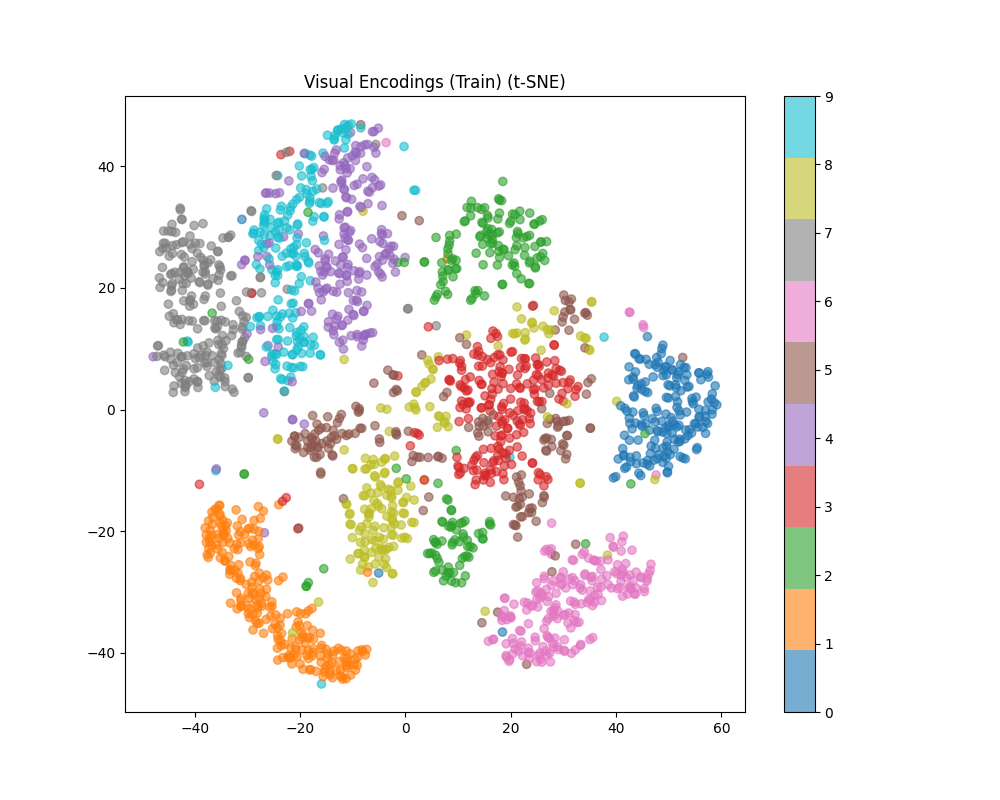

Displaying: /content/CDZ-TKBA/data/plots/visual_test_tsne.png


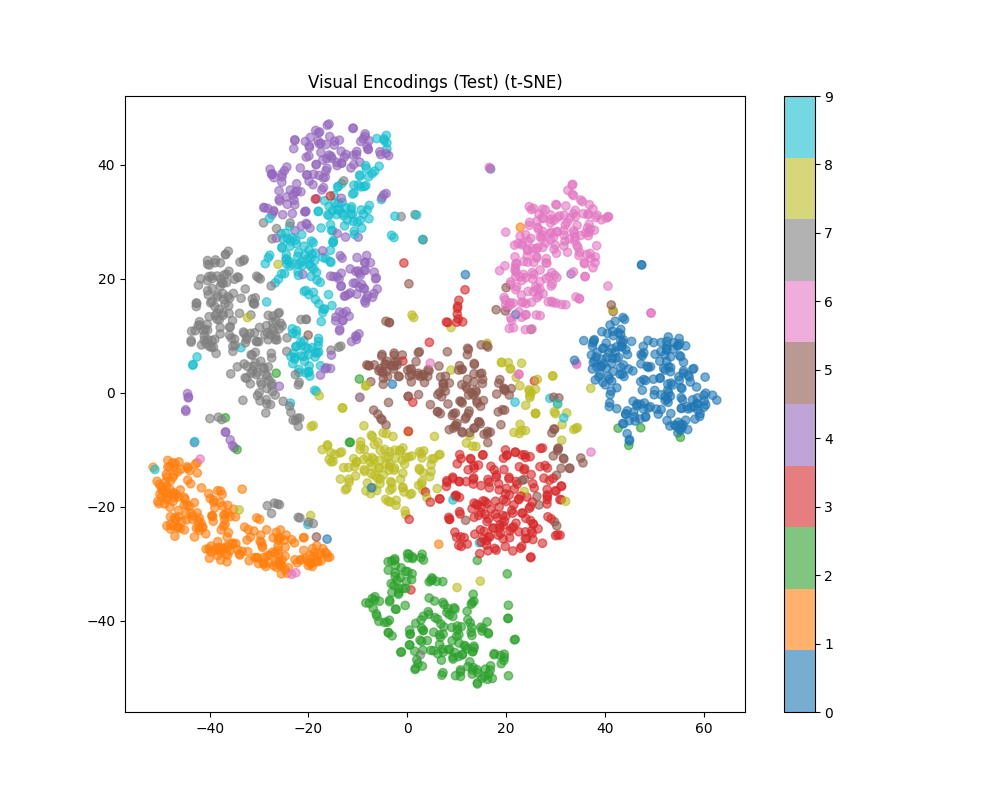

Displaying: /content/CDZ-TKBA/data/plots/audio_train_tsne.png


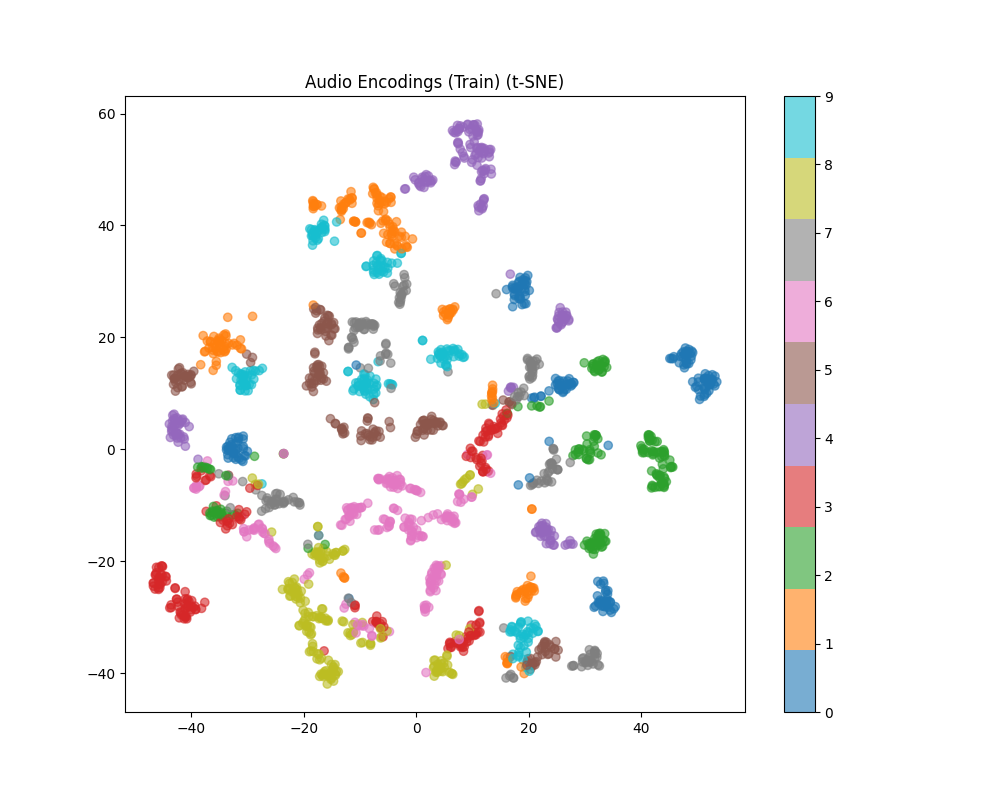

Displaying: /content/CDZ-TKBA/data/plots/audio_test_tsne.png


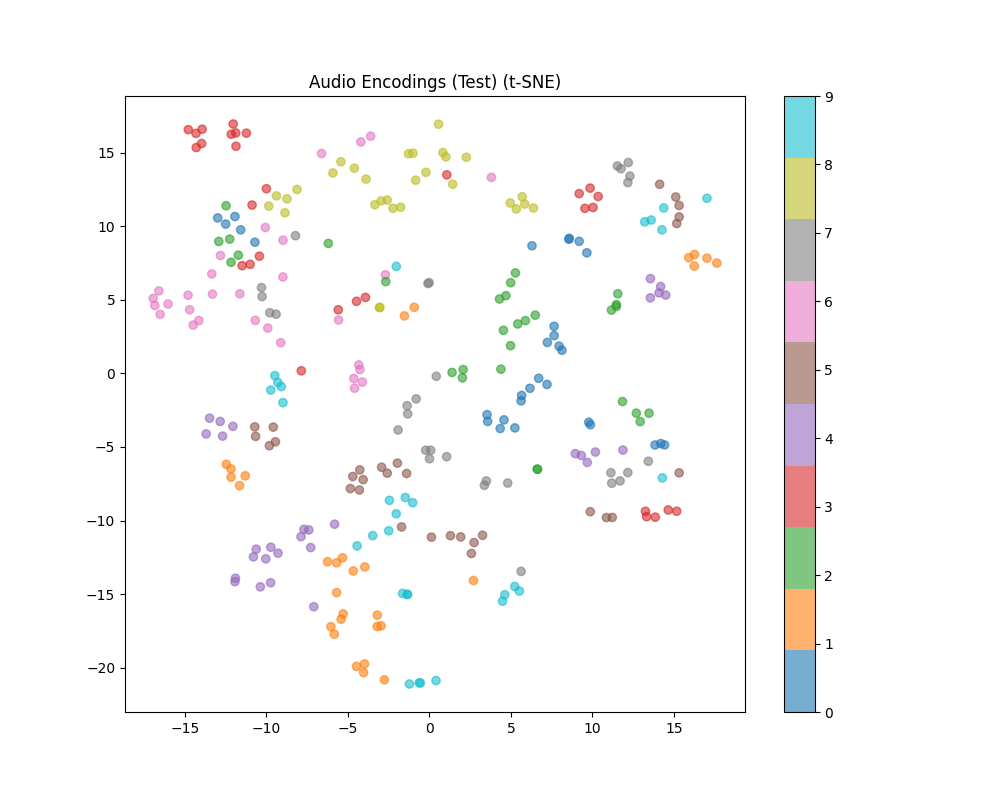

In [ ]:
from IPython.display import Image, display

image_paths = [
    "/content/CDZ-TKBA/data/plots/visual_train_tsne.png",
    "/content/CDZ-TKBA/data/plots/visual_test_tsne.png",
    "/content/CDZ-TKBA/data/plots/audio_train_tsne.png",
    "/content/CDZ-TKBA/data/plots/audio_test_tsne.png"
]

for path in image_paths:
    print(f"Displaying: {path}")
    display(Image(filename=path))

In [ ]:
!python scripts/7_refine_associations.py

=== Step 7: Refinement (Freeze & Associate) ===
Loading Brain...
Resetting CDZ Correlations...
Running Refinement for 100000 steps (Nodes Frozen, LR=0.001)...
Refining Step 0/100000
Refining Step 1000/100000
Refining Step 2000/100000
Refining Step 3000/100000
Refining Step 4000/100000
Refining Step 5000/100000
Refining Step 6000/100000
Refining Step 7000/100000
Refining Step 8000/100000
Refining Step 9000/100000
Refining Step 10000/100000
Refining Step 11000/100000
Refining Step 12000/100000
Refining Step 13000/100000
Refining Step 14000/100000
Refining Step 15000/100000
Refining Step 16000/100000
Refining Step 17000/100000
Refining Step 18000/100000
Refining Step 19000/100000
Refining Step 20000/100000
Refining Step 21000/100000
Refining Step 22000/100000
Refining Step 23000/100000
Refining Step 24000/100000
Refining Step 25000/100000
Refining Step 26000/100000
Refining Step 27000/100000
Refining Step 28000/100000
Refining Step 29000/100000
Refining Step 30000/100000
Refining Step 310

In [ ]:
!python scripts/6_demo_generation.py

=== Step 6: Generative Association Demo ===
Using device: cuda
Loading Autoencoders...

[Scenario 1] Vision -> Audio Generation
  Generated Audio Spectrogram and WAV for Digit 0
  Generated Audio Spectrogram and WAV for Digit 1
  Generated Audio Spectrogram and WAV for Digit 2
  Generated Audio Spectrogram and WAV for Digit 3
  Generated Audio Spectrogram and WAV for Digit 4
  Generated Audio Spectrogram and WAV for Digit 5
  Generated Audio Spectrogram and WAV for Digit 6
  Generated Audio Spectrogram and WAV for Digit 7
  Generated Audio Spectrogram and WAV for Digit 8
  Generated Audio Spectrogram and WAV for Digit 9

[Scenario 2] Audio -> Vision Generation
  Digit 0 candidates:
    1. c_visual_311 (Strength: 0.3850) - 680 nodes
    2. c_visual_3169 (Strength: 0.0090) - 129 nodes
    3. c_visual_11321 (Strength: 0.0078) - 25 nodes
  Digit 1 candidates:
    1. c_visual_2803 (Strength: 0.4447) - 463 nodes
    2. c_visual_16509 (Strength: 0.0093) - 1 nodes
    3. c_visual_16533 (Streng

In [ ]:
!python scripts/4_evaluate.py #Accuracy after 7_refine_associations.py

=== Step 4: Evaluation ===
Using device: cuda

--- Supervised Evaluation (Linear Probe on Encodings) ---
Visual Modality Accuracy: 0.9207
Audio Modality Accuracy: 0.8933

--- Unsupervised Evaluation (Brain Clusters) ---
Database state restored.
Mapping visual clusters...
visual Unsupervised Accuracy: 0.8996 (Clusters: 3028)
Mapping audio clusters...
audio Unsupervised Accuracy: 0.9233 (Clusters: 155)


In [ ]:
!zip -r CDZ-TKBA.zip /content/CDZ-TKBA

Streaming output truncated to the last 5000 lines.
  adding: content/CDZ-TKBA/data/spectrograms/train/9_jackson_22.npy (deflated 13%)
  adding: content/CDZ-TKBA/data/spectrograms/train/1_nicolas_47.npy (deflated 15%)
  adding: content/CDZ-TKBA/data/spectrograms/train/8_yweweler_48.png (deflated 0%)
  adding: content/CDZ-TKBA/data/spectrograms/train/9_yweweler_13.png (deflated 1%)
  adding: content/CDZ-TKBA/data/spectrograms/train/6_jackson_22.npy (deflated 12%)
  adding: content/CDZ-TKBA/data/spectrograms/train/0_george_46.png (deflated 1%)
  adding: content/CDZ-TKBA/data/spectrograms/train/0_jackson_17.png (deflated 1%)
  adding: content/CDZ-TKBA/data/spectrograms/train/7_jackson_36.png (deflated 1%)
  adding: content/CDZ-TKBA/data/spectrograms/train/4_theo_23.npy (deflated 12%)
  adding: content/CDZ-TKBA/data/spectrograms/train/2_theo_10.npy (deflated 16%)
  adding: content/CDZ-TKBA/data/spectrograms/train/6_nicolas_35.npy (deflated 19%)
  adding: content/CDZ-TKBA/data/spectrograms/t